In [15]:
#유방암 데이터셋
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 

In [17]:
#train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 66) 

# ***RandomForest***

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

#train 데이터 성능은 1.0
#test 데이터 성능은 약 0.958

1.0
0.958041958041958


트리개수 조절하기 - **n_estimators**

In [20]:
forest.n_estimators

100

In [21]:
#n_estimators가 50일 때
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.951048951048951


In [22]:
#n_estimators가 200일 때
forest = RandomForestClassifier(n_estimators=200, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.958041958041958


n_estimators를 50으로 줄이면 랜덤포레스트에 적용되는 트리의 개수가 50개로 줄어드는 것이고, 50개의 트리 결과를 반영하는 것보다 100개의 트리 결과를 반영하는 것이 일반화 성능면에서 더 좋다.

n_estimators를 200으로 늘리면 디폴트인 100개와 성능이 같으며 무작정 늘리는 것은 좋은 것이 아니다.(속도 차원 등) 우선 n_estimators는 디폴트값으로 진행

결정트리 생성 시 사용할 열 개수- **max_features**

In [23]:
forest.max_features

'auto'

In [24]:
cancer['data'].shape
#데이터셋의 열은 30개

(569, 30)

결정트리 생성 시 사용할 열 개수의 디폴트값은 열 개수의 제곱근 값

In [25]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

#max_features값은 1부터 30까지 5간격으로
max_features_settings = range(1,30,5)

#max_features_settings를 for문에 적용하여 max_features에 대입
for max_features in max_features_settings:
    forest = RandomForestClassifier(max_features=max_features, random_state=0)
    forest.fit(X_train, y_train)
    # 리스트에 추가
    training_accuracy.append(forest.score( X_train, y_train)) 
    test_accuracy.append(forest.score( X_test, y_test)) 

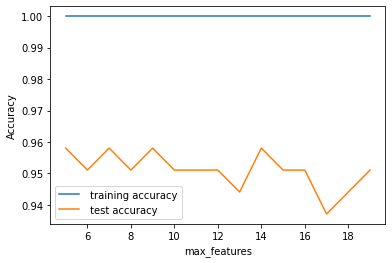

In [30]:
#시각화로 한눈에 파악
import matplotlib.pyplot as plt
plt.plot(max_features_settings, training_accuracy, label =" training accuracy") 
plt.plot(max_features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_features") 
plt.legend()

max_features의 범위를 5부터 20까지로 좁혀서 다시 확인

In [27]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

#max_features값은 1부터 30까지 5간격으로
max_features_settings = range(5,20)

#max_features_settings를 for문에 적용하여 max_features에 대입
for max_features in max_features_settings:
    forest = RandomForestClassifier(max_features=max_features, random_state=0)
    forest.fit(X_train, y_train)
    # 리스트에 추가
    training_accuracy.append(forest.score( X_train, y_train)) 
    test_accuracy.append(forest.score( X_test, y_test)) 

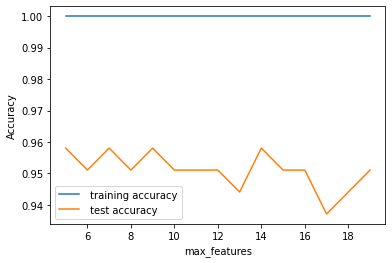

In [31]:
#시각화로 한눈에 파악
plt.plot(max_features_settings, training_accuracy, label =" training accuracy") 
plt.plot(max_features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_features") 
plt.legend()

In [29]:
max(test_accuracy)

0.958041958041958

max_features값을 조정하며 test 성능이 가장 좋은 지점을 찾아보았지만 디폴트 max_features값을 적용하였을 때와 같은 성능을 보인다.

# ***Gradient Boosting***

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.958


In [34]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.993
Test set accuracy: 0.937


In [35]:
gbrt = GradientBoostingClassifier(learning_rate=1,random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))
#learning_rate는 너무 작거나 너무 크면 성능이 오히려 떨어진다 -> 조정 신중히 

Training set accuracy: 1.000
Test set accuracy: 0.951


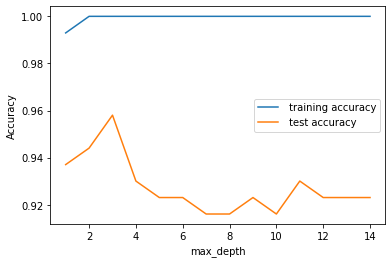

In [36]:
training_accuracy = [] 
test_accuracy = []

depth_settings = range(1, 15)
for depth in depth_settings:
    gbrt = GradientBoostingClassifier(max_depth = depth) 
    gbrt.fit( X_train, y_train) 
    training_accuracy.append(gbrt.score( X_train, y_train)) 
    test_accuracy.append(gbrt.score( X_test, y_test)) 
    
plt.plot(depth_settings, training_accuracy, label =" training accuracy") 
plt.plot(depth_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_depth") 
plt.legend()

In [37]:
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.993
Test set accuracy: 0.937
